# Analysis of Umbrella Sampling Simulations
The potential of mean force for a sodium - chloride ion pair in water as a function of its separation is shown below:

![img](nacl_pmf.png)

Ref: [Baumketner, J Chem Phys. 2009 Mar 14; 130(10): 104106.](https://doi.org/10.1063%2F1.3081138) 

This notebook provides the Python code to perform the same analysis on the Umbrella sampling data you have generated. In addition it can help you identify where running extra windows of umbrella sampling might improve the estimation.

This first cell imports the Python packages that will be needed:

In [15]:
# Import the required packages:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pathlib import Path
import subprocess

ESMFold.ipynb		       example_string_workshop.py
example_string_workshop.ipynb  omegafold.ipynb


This next cell will produce a plot of all the histograms. If there are poorly-sampled regions, you might want to go back and run some more simulations with parameters that will help "fill the gaps".

In [16]:
plt.figure(figsize=(12, 10))
basedir = Path('.')
metadata = basedir / 'metadata'
dtot = []
for line in metadata.read_text().split('\n'):
    if len(line) > 0:
        dfile, dref, k = line.split()
        data = np.loadtxt(dfile)
        dtot += list(data[:, 1] / 10)
h, edges = np.histogram(dtot, bins=50)
for line in metadata.read_text().split('\n'):
    if len(line) > 0:
        dfile, dref, k = line.split()
        data = np.loadtxt(dfile)
        plt.hist(data[:, 1] / 10, bins=edges, alpha=0.3, label=dfile)
plt.legend()
plt.xlabel('r (nm)')
out = plt.ylabel('number of samples')

This next cell checks that the WHAM program is installed and working:

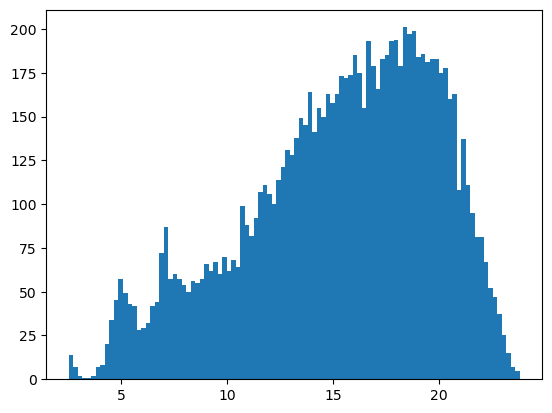

In [18]:
whamexe = basedir / 'wham/wham/wham'
if not whamexe.exists():
    result = subprocess.run(f'cd {basedir / "wham/wham"}; make', shell=True)
result = subprocess.run(f'{whamexe} 2.6 10.0 50 0.001 300.0 1.0 metadata free.dat', shell=True, capture_output=True)
if result.returncode !- 0:
    print("Whoops - you don't seem to have a working copy of wham - ask for help.")
else:
    print('OK, WHAM program is present and working, please carry on.')

Read in the data from the WHAM analysis, and process to convert to a PMF:

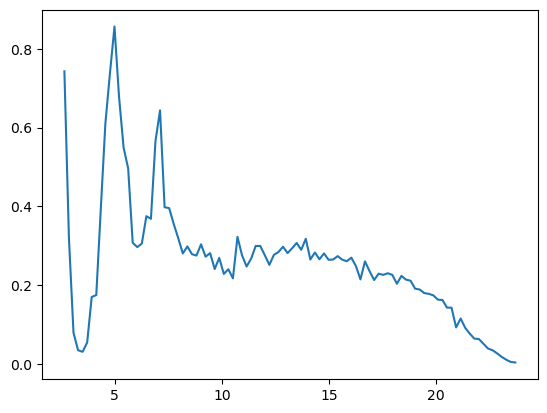

In [20]:
# Load the data from the file "free,dat" created by WHAM:
free = basedir / 'free.dat'
data = np.loadtxt(free)
#Extract the columns of data that are useful:
r = data[:, 0] / 10.0 # The values of the Na-Cl separation where energies have been calculated. Convert from Angstroms to nanometers
prob = data[:, 3] # The sampling probabilities at each point
# Do the volume correction:
shell_thickness= (r[1:] - r[:-1]).mean()
shell_volume = [4 * np.pi * radius**2 * shell_thickness for radius in r]
pmf = -np.log(prob / shell_volume)
# Scale and shift the data:
pmf /= 1.681 # scale for units of kCal/mol
pmf -= pmf.min() # set pmf minimum to zero
# Plot the result:
plt.plot(r, pmf)
plt.xlabel('r (nm)')
out = plt.ylabel('PMF (kCal/mol)')

How does the graph compare wioth the literature result? Are there poorly sampled regions that might be causing errors? You can run some extra umbella sampling windows to "fill in the gaps" if you like, and then run this notebook again with the extra data.